## Circular Linear Regression

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
from spyglass.shijiegu.circularLinearFit import CircularRegression

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [33]:
X

array([[ 0.10983361],
       [ 0.04317532],
       [-0.00521688],
       [-0.04494078],
       [-0.05692069],
       [ 0.06457224],
       [-0.08582229],
       [ 0.04836139],
       [-0.13785778],
       [ 0.19739243],
       [ 0.12934658],
       [ 0.21144475],
       [ 0.12188384],
       [ 0.04562426],
       [-0.0512516 ],
       [-0.01989943],
       [ 0.15416191],
       [-0.06360567],
       [ 0.01936958],
       [ 0.09351657],
       [-0.00239452],
       [-0.04362068],
       [ 0.00668222],
       [-0.02806864],
       [ 0.13049689],
       [-0.04385533],
       [ 0.14270425],
       [ 0.26534925],
       [ 0.02906808],
       [-0.03668695],
       [-0.03478231],
       [ 0.0767927 ],
       [ 0.11361652],
       [ 0.1126666 ],
       [ 0.08712557],
       [ 0.14893958],
       [ 0.30867304],
       [ 0.01541728],
       [ 0.12840675],
       [ 0.08730224],
       [ 0.10727066],
       [ 0.19401835],
       [ 0.08445012],
       [ 0.16039003],
       [ 0.08876637],
       [ 0

In [41]:
# Params
n_obs = 300
nX = 1
n_traversals = 10
noise_lev = 0.1

# Create time series where dependent variable, y moves around
# the circle at constant velocity.
_raw_y = np.linspace(0, 2 * n_traversals * np.pi, n_obs + 1)[:-1]
y = - (_raw_y % (2 * np.pi) - np.pi)
y_data = y + np.random.randn(n_obs) * noise_lev

# Create predictor variables 
X_locs = np.linspace(0, np.pi * 2, nX + 1)[:-1]
#X = np.array([(l,0) for l in X_locs]).T
X = np.array([scipy.stats.vonmises(loc=l, kappa=1.0).pdf(y) for l in X_locs]).T
X += np.random.randn(n_obs, nX) * noise_lev

In [42]:
X.shape

(300, 1)

In [43]:
y_data.shape

(300,)

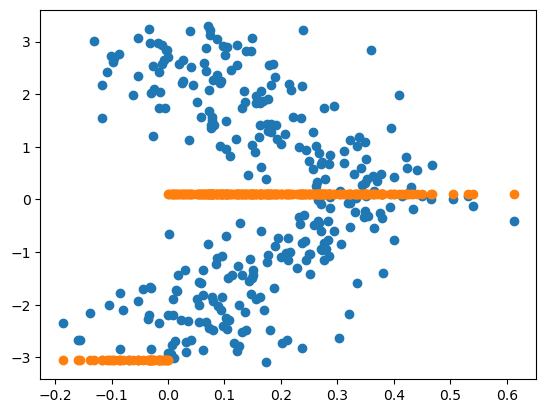

In [46]:
plt.scatter(X,y_data)

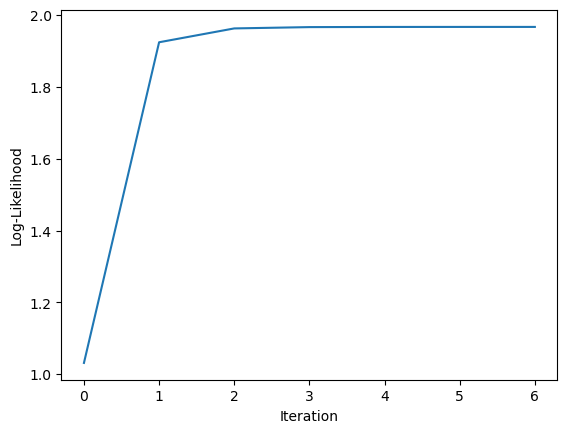

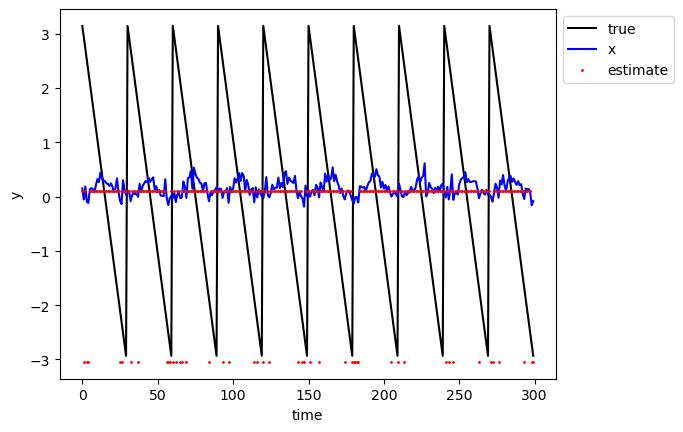

[0.23483754 0.14545705 0.19122625 0.1955511  0.21016502]


In [45]:


## Fit Model

model = CircularRegression(max_iter=20)
model.fit(X, y_data)

plt.figure()
plt.plot(model.log_like_hist_)
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")

## Show Fit

plt.figure()
plt.plot(y, "-k", label="true")
plt.plot(X, "-b", label="x")
plt.plot(model.predict(X), '.r', ms=2, label="estimate")
plt.ylabel("y")
plt.xlabel("time")
plt.legend(bbox_to_anchor=(1,1,0,0))
plt.show()

## Cross Validation Demo
from sklearn.model_selection import cross_val_score
print(cross_val_score(CircularRegression(alpha=1.0), X, y, cv=5))